In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler


In [67]:
data = pd.read_csv("./data/profitability_of_startups.csv")

In [68]:
data.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [69]:
#data.drop(data[data["R&D Spend"] == 0 )
#remove data for when it some things are zero
data = data.loc[(data["R&D Spend"] != 0) & (data["Marketing Spend"] != 0)]

,R&D Spend,Administration,Marketing Spend,State,Profit
47,0.0,135426.92,0.0,California,42559.73


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [10]:
from sklearn.impute import SimpleImputer
#add the mean where there are null values

In [11]:
si= SimpleImputer(0)

In [12]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [13]:
si.fit(data[['R&D Spend', 'Administration', 'Marketing Spend']])

SimpleImputer(add_indicator=False, copy=True, fill_value=None, missing_values=0,
              strategy='mean', verbose=0)

In [14]:
data[['R&D Spend', 'Administration', 'Marketing Spend']]= \
    si.transform(data[['R&D Spend', 'Administration', 'Marketing Spend']])
#\ means code carrys on next line

In [15]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,76793.349583,121344.639600,224494.784894,112012.639200
std,43312.151465,28017.802755,109792.846033,40306.180338
min,542.050000,51283.140000,1903.930000,14681.400000
25%,46117.032500,103730.875000,142431.385000,90138.902500
50%,75791.365000,122699.795000,224494.784894,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [16]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [18]:
dataEncoded = pd.get_dummies(data,columns = ['State'], drop_first=True)

In [19]:
dataEncoded.head()

#good to standardise here

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [20]:
scalar = MinMaxScaler()

In [22]:
dataEncoded.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')

In [25]:
dataScaled = dataEncoded.copy()

In [39]:
dataScaled[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']] = \
scalar.fit_transform(dataEncoded[['R&D Spend', 'Administration', 
                                  'Marketing Spend', 'Profit']])

In [40]:
dataScaled.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,1.000000,0.651744,1.000000,1.000000,0,1
1,0.983305,0.761972,0.940654,0.997355,0,0
2,0.927748,0.379579,0.864115,0.993178,1,0
3,0.872719,0.512998,0.811474,0.947292,0,1
4,0.858975,0.305328,0.775228,0.853171,1,0


In [41]:
import statsmodels.api as sm
#remember this doesnt account for +1 on the +c so need to add it in

In [42]:
dataCleaned = sm.add_constant(dataScaled)

c:\users\aakash.patel\appdata\local\continuum\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [43]:
dataCleaned.head()

,const,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,1.0,1.000000,0.651744,1.000000,1.000000,0,1
1,1.0,0.983305,0.761972,0.940654,0.997355,0,0
2,1.0,0.927748,0.379579,0.864115,0.993178,1,0
3,1.0,0.872719,0.512998,0.811474,0.947292,0,1
4,1.0,0.858975,0.305328,0.775228,0.853171,1,0


In [60]:
results = \
sm.OLS(dataCleaned["Profit"], 
       dataCleaned.drop(["Profit", "Administration","State_Florida", "State_New York"], axis = 1)).fit()

In [61]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     92.19
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           5.41e-17
Time:                        12:53:30   Log-Likelihood:                 43.551
No. Observations:                  50   AIC:                            -81.10
Df Residuals:                      47   BIC:                            -75.37
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1591      0.035     

Text(0, 0.5, 'Profit')

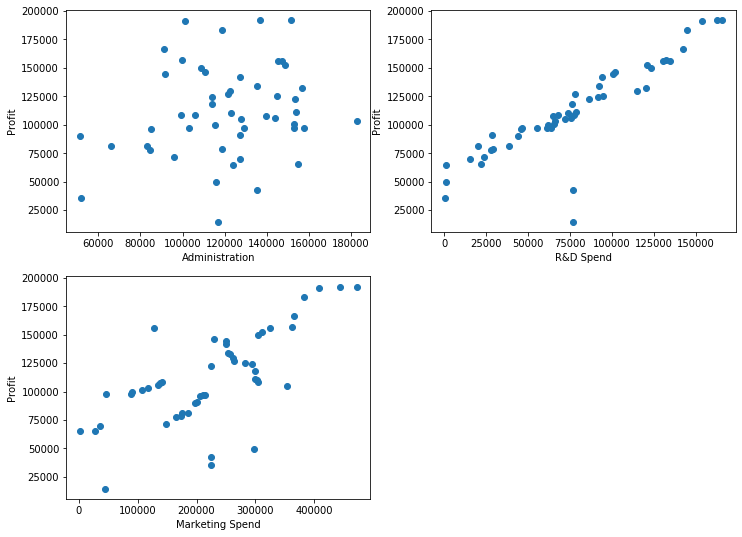

In [62]:
plt.figure(figsize=(12,9))
plt.subplot(2,2,1)
plt.scatter(data["Administration"], data["Profit"])
plt.xlabel("Administration")
plt.ylabel("Profit")

plt.subplot(2,2,2)
plt.scatter(data["R&D Spend"], data["Profit"])
plt.xlabel("R&D Spend")
plt.ylabel("Profit")

plt.subplot(2,2,3)
plt.scatter(data["Marketing Spend"], data["Profit"])
plt.xlabel("Marketing Spend")
plt.ylabel("Profit")


<BarContainer object of 3 artists>

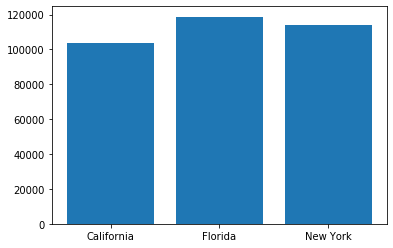

In [59]:
plt.bar(list(set(data['State'])),data.groupby('State')["Profit"].mean())

#set only contains unique values
#list is needed as we need to provide a sequence of scalars